In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import time

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = datasets.FashionMNIST('Data_FashionMNIST/', download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.FashionMNIST('DATA_FashionMNIST/', download=True, train=False, transform=transform)
testLoader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

cuda


In [3]:
training_data = enumerate(trainLoader)
batch_idx, (images, labels) = next(training_data)
print(type(images))
print(images.shape)
print(labels.shape)

# Function to show multiple images
def show_images(images, labels):
    fig = plt.figure()
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title("Label: {}".format(labels[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


## Linear MODEL

Epoch [1/150], Step [100/938], D_loss: 0.1263633295893669, G_loss: 3.452056407928467
Epoch [1/150], Step [200/938], D_loss: 1.1204369068145752, G_loss: 1.1261482238769531
Epoch [1/150], Step [300/938], D_loss: 2.3011030852794647, G_loss: 0.36581701040267944
Epoch [1/150], Step [400/938], D_loss: 0.4229333996772766, G_loss: 2.3756449222564697
Epoch [1/150], Step [500/938], D_loss: 0.32651373744010925, G_loss: 2.5203561782836914
Epoch [1/150], Step [600/938], D_loss: 1.428682565689087, G_loss: 2.5084118843078613
Epoch [1/150], Step [700/938], D_loss: 0.22192806005477905, G_loss: 3.5495500564575195
Epoch [1/150], Step [800/938], D_loss: 0.34075579047203064, G_loss: 2.7954812049865723
Epoch [1/150], Step [900/938], D_loss: 0.5258505344390869, G_loss: 4.021430969238281
Epoch [2/150], Step [100/938], D_loss: 0.671917587518692, G_loss: 2.165403366088867
Epoch [2/150], Step [200/938], D_loss: 0.3061056286096573, G_loss: 3.2695937156677246
Epoch [2/150], Step [300/938], D_loss: 0.48667368292808

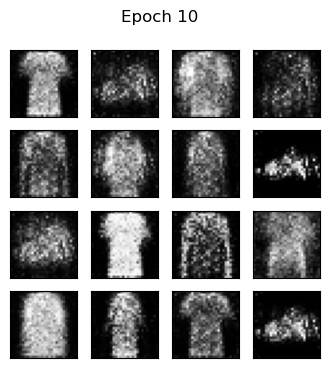

Epoch [11/150], Step [100/938], D_loss: 0.7650015354156494, G_loss: 1.7136650085449219
Epoch [11/150], Step [200/938], D_loss: 1.191389799118042, G_loss: 1.941023588180542
Epoch [11/150], Step [300/938], D_loss: 1.0162931978702545, G_loss: 1.5288145542144775
Epoch [11/150], Step [400/938], D_loss: 1.0836349129676819, G_loss: 1.8631166219711304
Epoch [11/150], Step [500/938], D_loss: 0.7939683198928833, G_loss: 1.688901424407959
Epoch [11/150], Step [600/938], D_loss: 1.293355941772461, G_loss: 1.280405044555664
Epoch [11/150], Step [700/938], D_loss: 1.096323013305664, G_loss: 1.5733070373535156
Epoch [11/150], Step [800/938], D_loss: 0.9211340844631195, G_loss: 1.4259873628616333
Epoch [11/150], Step [900/938], D_loss: 0.8057011067867279, G_loss: 1.5860406160354614
Epoch [12/150], Step [100/938], D_loss: 0.9909359812736511, G_loss: 1.393721103668213
Epoch [12/150], Step [200/938], D_loss: 1.0898612439632416, G_loss: 2.267911434173584
Epoch [12/150], Step [300/938], D_loss: 1.017955809

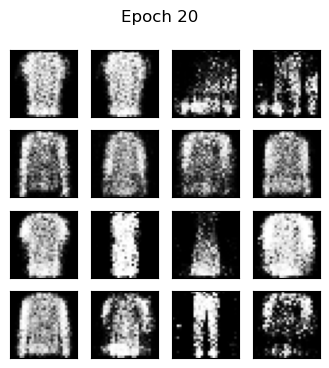

Epoch [21/150], Step [100/938], D_loss: 1.046657532453537, G_loss: 1.2375285625457764
Epoch [21/150], Step [200/938], D_loss: 1.1563318371772766, G_loss: 1.227888822555542
Epoch [21/150], Step [300/938], D_loss: 1.2434729933738708, G_loss: 1.1251674890518188
Epoch [21/150], Step [400/938], D_loss: 1.237840712070465, G_loss: 1.2180793285369873
Epoch [21/150], Step [500/938], D_loss: 1.2140522003173828, G_loss: 1.2039291858673096
Epoch [21/150], Step [600/938], D_loss: 1.3172305822372437, G_loss: 1.4434083700180054
Epoch [21/150], Step [700/938], D_loss: 1.107343077659607, G_loss: 1.5785709619522095
Epoch [21/150], Step [800/938], D_loss: 1.335313320159912, G_loss: 0.8893263936042786
Epoch [21/150], Step [900/938], D_loss: 1.047899305820465, G_loss: 1.2120096683502197
Epoch [22/150], Step [100/938], D_loss: 1.2570868730545044, G_loss: 1.2186285257339478
Epoch [22/150], Step [200/938], D_loss: 0.9206316471099854, G_loss: 1.3393058776855469
Epoch [22/150], Step [300/938], D_loss: 0.9434775

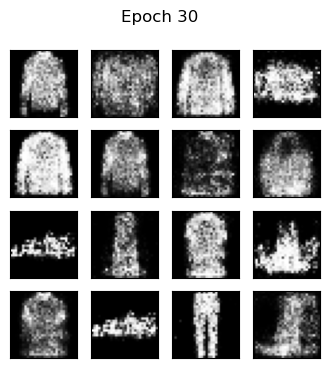

Epoch [31/150], Step [100/938], D_loss: 1.1960458159446716, G_loss: 1.082869052886963
Epoch [31/150], Step [200/938], D_loss: 1.2648481726646423, G_loss: 1.0538121461868286
Epoch [31/150], Step [300/938], D_loss: 1.056728184223175, G_loss: 1.23691987991333
Epoch [31/150], Step [400/938], D_loss: 1.1605311632156372, G_loss: 1.1569814682006836
Epoch [31/150], Step [500/938], D_loss: 0.9343960881233215, G_loss: 1.2781095504760742
Epoch [31/150], Step [600/938], D_loss: 1.468806505203247, G_loss: 1.0086822509765625
Epoch [31/150], Step [700/938], D_loss: 1.050651490688324, G_loss: 1.5331408977508545
Epoch [31/150], Step [800/938], D_loss: 0.9637780487537384, G_loss: 1.2270475625991821
Epoch [31/150], Step [900/938], D_loss: 0.9590809941291809, G_loss: 1.2375738620758057
Epoch [32/150], Step [100/938], D_loss: 0.9858324527740479, G_loss: 1.19405198097229
Epoch [32/150], Step [200/938], D_loss: 1.3218481540679932, G_loss: 1.0182944536209106
Epoch [32/150], Step [300/938], D_loss: 1.074328720

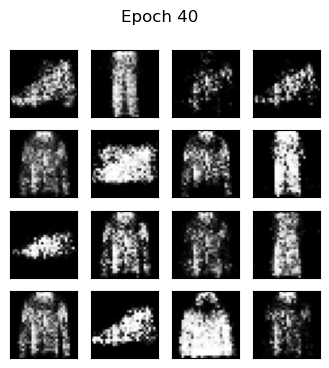

Epoch [41/150], Step [100/938], D_loss: 1.2000949382781982, G_loss: 0.9289778470993042
Epoch [41/150], Step [200/938], D_loss: 1.124580204486847, G_loss: 1.2008295059204102
Epoch [41/150], Step [300/938], D_loss: 0.9148360788822174, G_loss: 1.4815372228622437
Epoch [41/150], Step [400/938], D_loss: 1.3318167328834534, G_loss: 1.0577342510223389
Epoch [41/150], Step [500/938], D_loss: 1.3060086965560913, G_loss: 0.9238442182540894
Epoch [41/150], Step [600/938], D_loss: 0.9605845808982849, G_loss: 1.3608174324035645
Epoch [41/150], Step [700/938], D_loss: 1.5549708008766174, G_loss: 1.1611690521240234
Epoch [41/150], Step [800/938], D_loss: 1.2436721324920654, G_loss: 1.04477858543396
Epoch [41/150], Step [900/938], D_loss: 1.136282503604889, G_loss: 1.0796191692352295
Epoch [42/150], Step [100/938], D_loss: 1.258035659790039, G_loss: 0.9552066326141357
Epoch [42/150], Step [200/938], D_loss: 1.0892728567123413, G_loss: 1.1517490148544312
Epoch [42/150], Step [300/938], D_loss: 1.280610

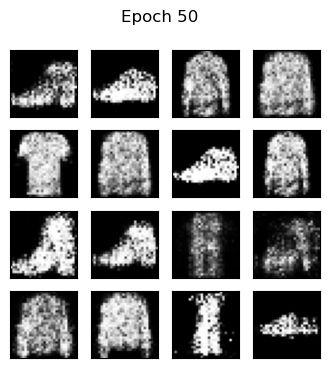

Epoch [51/150], Step [100/938], D_loss: 1.1065338253974915, G_loss: 1.0433320999145508
Epoch [51/150], Step [200/938], D_loss: 1.1037258505821228, G_loss: 1.0176992416381836
Epoch [51/150], Step [300/938], D_loss: 1.1891300082206726, G_loss: 1.2470424175262451
Epoch [51/150], Step [400/938], D_loss: 1.1814265847206116, G_loss: 1.2706453800201416
Epoch [51/150], Step [500/938], D_loss: 1.220983862876892, G_loss: 1.0353273153305054
Epoch [51/150], Step [600/938], D_loss: 1.249173879623413, G_loss: 1.07511305809021
Epoch [51/150], Step [700/938], D_loss: 1.1981514692306519, G_loss: 0.9623551368713379
Epoch [51/150], Step [800/938], D_loss: 1.2311254739761353, G_loss: 0.997724175453186
Epoch [51/150], Step [900/938], D_loss: 1.3038748800754547, G_loss: 1.1893973350524902
Epoch [52/150], Step [100/938], D_loss: 1.231022834777832, G_loss: 1.0656557083129883
Epoch [52/150], Step [200/938], D_loss: 1.1792954206466675, G_loss: 1.0815105438232422
Epoch [52/150], Step [300/938], D_loss: 1.2067995

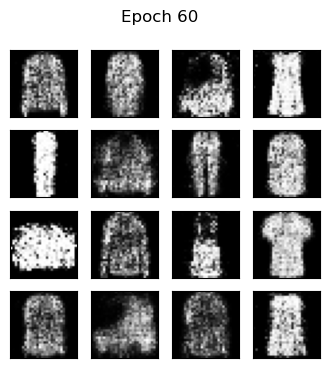

Epoch [61/150], Step [100/938], D_loss: 1.134943664073944, G_loss: 1.1232335567474365
Epoch [61/150], Step [200/938], D_loss: 1.3815327882766724, G_loss: 0.9124255180358887
Epoch [61/150], Step [300/938], D_loss: 1.1994010210037231, G_loss: 1.0516595840454102
Epoch [61/150], Step [400/938], D_loss: 1.1924216151237488, G_loss: 1.031107783317566
Epoch [61/150], Step [500/938], D_loss: 1.251440703868866, G_loss: 1.2145578861236572
Epoch [61/150], Step [600/938], D_loss: 1.12555730342865, G_loss: 0.999427318572998
Epoch [61/150], Step [700/938], D_loss: 1.3564783334732056, G_loss: 0.8619022369384766
Epoch [61/150], Step [800/938], D_loss: 1.2911458015441895, G_loss: 0.8295010328292847
Epoch [61/150], Step [900/938], D_loss: 1.200135588645935, G_loss: 0.963737964630127
Epoch [62/150], Step [100/938], D_loss: 1.5429378151893616, G_loss: 0.8766179084777832
Epoch [62/150], Step [200/938], D_loss: 1.413236141204834, G_loss: 1.0936304330825806
Epoch [62/150], Step [300/938], D_loss: 1.2327333092

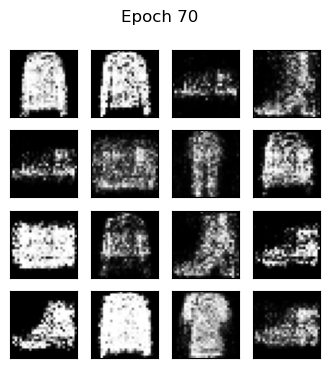

Epoch [71/150], Step [100/938], D_loss: 1.224703848361969, G_loss: 1.0798499584197998
Epoch [71/150], Step [200/938], D_loss: 1.2030060291290283, G_loss: 1.1383068561553955
Epoch [71/150], Step [300/938], D_loss: 1.486512839794159, G_loss: 0.8397360444068909
Epoch [71/150], Step [400/938], D_loss: 1.383217215538025, G_loss: 0.938392162322998
Epoch [71/150], Step [500/938], D_loss: 1.2579593658447266, G_loss: 0.95357346534729
Epoch [71/150], Step [600/938], D_loss: 1.3335065841674805, G_loss: 0.9858481884002686
Epoch [71/150], Step [700/938], D_loss: 1.2644340991973877, G_loss: 0.8920360207557678
Epoch [71/150], Step [800/938], D_loss: 1.2365862131118774, G_loss: 0.9913275837898254
Epoch [71/150], Step [900/938], D_loss: 1.134407639503479, G_loss: 1.055539846420288
Epoch [72/150], Step [100/938], D_loss: 1.2620849609375, G_loss: 0.8310872316360474
Epoch [72/150], Step [200/938], D_loss: 1.2095149159431458, G_loss: 1.1042686700820923
Epoch [72/150], Step [300/938], D_loss: 1.289833843708

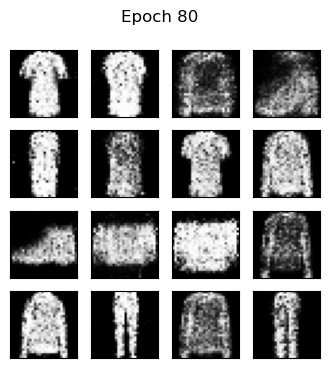

Epoch [81/150], Step [100/938], D_loss: 1.0128946900367737, G_loss: 1.3007726669311523
Epoch [81/150], Step [200/938], D_loss: 1.338120937347412, G_loss: 0.8607102632522583
Epoch [81/150], Step [300/938], D_loss: 1.2501721382141113, G_loss: 1.035941243171692
Epoch [81/150], Step [400/938], D_loss: 1.315794825553894, G_loss: 1.013904333114624
Epoch [81/150], Step [500/938], D_loss: 1.2062914967536926, G_loss: 0.9268900156021118
Epoch [81/150], Step [600/938], D_loss: 1.27668035030365, G_loss: 1.145484447479248
Epoch [81/150], Step [700/938], D_loss: 1.1074702143669128, G_loss: 1.1040635108947754
Epoch [81/150], Step [800/938], D_loss: 1.3304671049118042, G_loss: 0.9845829010009766
Epoch [81/150], Step [900/938], D_loss: 1.202096402645111, G_loss: 1.0814712047576904
Epoch [82/150], Step [100/938], D_loss: 1.2035067081451416, G_loss: 1.005321741104126
Epoch [82/150], Step [200/938], D_loss: 1.2003856301307678, G_loss: 0.9331204891204834
Epoch [82/150], Step [300/938], D_loss: 1.2017208337

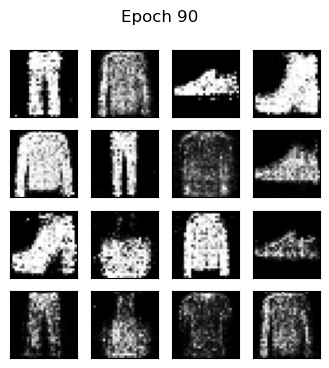

Epoch [91/150], Step [100/938], D_loss: 1.336733341217041, G_loss: 0.8146111965179443
Epoch [91/150], Step [200/938], D_loss: 1.3313285112380981, G_loss: 1.0663139820098877
Epoch [91/150], Step [300/938], D_loss: 1.3700044751167297, G_loss: 0.8766343593597412
Epoch [91/150], Step [400/938], D_loss: 1.2204949855804443, G_loss: 0.9977967143058777
Epoch [91/150], Step [500/938], D_loss: 1.2461464405059814, G_loss: 1.0927019119262695
Epoch [91/150], Step [600/938], D_loss: 1.4485474824905396, G_loss: 1.0437610149383545
Epoch [91/150], Step [700/938], D_loss: 1.438993215560913, G_loss: 0.9116083383560181
Epoch [91/150], Step [800/938], D_loss: 1.4220225811004639, G_loss: 0.846552848815918
Epoch [91/150], Step [900/938], D_loss: 1.3327029943466187, G_loss: 0.9562783241271973
Epoch [92/150], Step [100/938], D_loss: 1.376034438610077, G_loss: 0.8539685010910034
Epoch [92/150], Step [200/938], D_loss: 1.2136325240135193, G_loss: 0.9031231999397278
Epoch [92/150], Step [300/938], D_loss: 1.12736

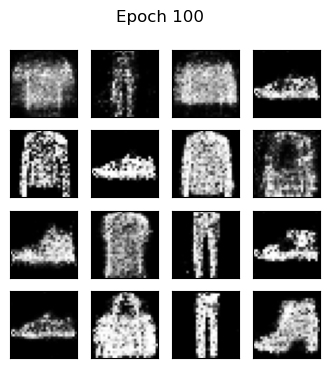

Epoch [101/150], Step [100/938], D_loss: 1.1947969198226929, G_loss: 0.925186038017273
Epoch [101/150], Step [200/938], D_loss: 1.2429041862487793, G_loss: 0.9941319823265076
Epoch [101/150], Step [300/938], D_loss: 1.299320936203003, G_loss: 0.9490922689437866
Epoch [101/150], Step [400/938], D_loss: 1.4157836437225342, G_loss: 0.8619368672370911
Epoch [101/150], Step [500/938], D_loss: 1.359574019908905, G_loss: 0.8566478490829468
Epoch [101/150], Step [600/938], D_loss: 1.2784765362739563, G_loss: 0.8089950084686279
Epoch [101/150], Step [700/938], D_loss: 1.445281982421875, G_loss: 0.7573330402374268
Epoch [101/150], Step [800/938], D_loss: 1.3012366890907288, G_loss: 1.0107910633087158
Epoch [101/150], Step [900/938], D_loss: 1.1224614381790161, G_loss: 0.9242551326751709
Epoch [102/150], Step [100/938], D_loss: 1.3602754473686218, G_loss: 0.9234941601753235
Epoch [102/150], Step [200/938], D_loss: 1.4597272872924805, G_loss: 0.7716227769851685
Epoch [102/150], Step [300/938], D_l

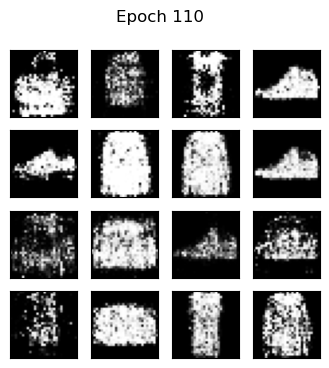

Epoch [111/150], Step [100/938], D_loss: 1.328777015209198, G_loss: 0.9394935369491577
Epoch [111/150], Step [200/938], D_loss: 1.4193074703216553, G_loss: 0.8429662585258484
Epoch [111/150], Step [300/938], D_loss: 1.314427673816681, G_loss: 0.8572319746017456
Epoch [111/150], Step [400/938], D_loss: 1.2625664472579956, G_loss: 0.8869274258613586
Epoch [111/150], Step [500/938], D_loss: 1.218934953212738, G_loss: 1.021680474281311
Epoch [111/150], Step [600/938], D_loss: 1.3368850350379944, G_loss: 0.9320982694625854
Epoch [111/150], Step [700/938], D_loss: 1.1598504185676575, G_loss: 0.9033862352371216
Epoch [111/150], Step [800/938], D_loss: 1.3129000663757324, G_loss: 0.7936680316925049
Epoch [111/150], Step [900/938], D_loss: 1.315590739250183, G_loss: 0.8848305940628052
Epoch [112/150], Step [100/938], D_loss: 1.3838597536087036, G_loss: 0.8586533069610596
Epoch [112/150], Step [200/938], D_loss: 1.2255111932754517, G_loss: 0.8588517904281616
Epoch [112/150], Step [300/938], D_lo

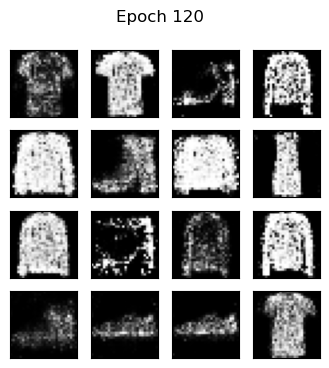

Epoch [121/150], Step [100/938], D_loss: 1.3575224876403809, G_loss: 0.8541669845581055
Epoch [121/150], Step [200/938], D_loss: 1.212525725364685, G_loss: 1.1237146854400635
Epoch [121/150], Step [300/938], D_loss: 1.3864818215370178, G_loss: 0.7841452956199646
Epoch [121/150], Step [400/938], D_loss: 1.263446867465973, G_loss: 0.9532179832458496
Epoch [121/150], Step [500/938], D_loss: 1.3832118511199951, G_loss: 0.7959348559379578
Epoch [121/150], Step [600/938], D_loss: 1.370680034160614, G_loss: 0.8794941902160645
Epoch [121/150], Step [700/938], D_loss: 1.4586478471755981, G_loss: 0.6846950054168701
Epoch [121/150], Step [800/938], D_loss: 1.248914122581482, G_loss: 0.9923996925354004
Epoch [121/150], Step [900/938], D_loss: 1.3005408644676208, G_loss: 0.8100290298461914
Epoch [122/150], Step [100/938], D_loss: 1.3211792707443237, G_loss: 0.8950361013412476
Epoch [122/150], Step [200/938], D_loss: 1.3165133595466614, G_loss: 0.7507821321487427
Epoch [122/150], Step [300/938], D_l

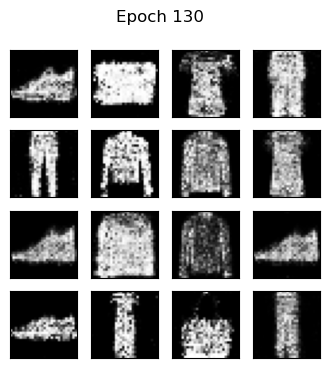

Epoch [131/150], Step [100/938], D_loss: 1.2922798991203308, G_loss: 0.7676080465316772
Epoch [131/150], Step [200/938], D_loss: 1.2751610279083252, G_loss: 0.8764910697937012
Epoch [131/150], Step [300/938], D_loss: 1.2538806200027466, G_loss: 1.069503664970398
Epoch [131/150], Step [400/938], D_loss: 1.3488330841064453, G_loss: 0.8385028839111328
Epoch [131/150], Step [500/938], D_loss: 1.262081801891327, G_loss: 0.8488863706588745
Epoch [131/150], Step [600/938], D_loss: 1.5328956842422485, G_loss: 0.8064844012260437
Epoch [131/150], Step [700/938], D_loss: 1.250918984413147, G_loss: 0.9314572811126709
Epoch [131/150], Step [800/938], D_loss: 1.305572748184204, G_loss: 0.8714298605918884
Epoch [131/150], Step [900/938], D_loss: 1.4076783657073975, G_loss: 0.762233555316925
Epoch [132/150], Step [100/938], D_loss: 1.1851748824119568, G_loss: 1.1633868217468262
Epoch [132/150], Step [200/938], D_loss: 1.2649608254432678, G_loss: 0.9084793329238892
Epoch [132/150], Step [300/938], D_lo

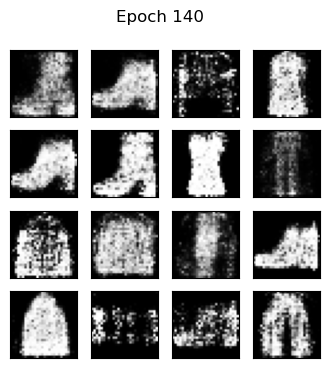

Epoch [141/150], Step [100/938], D_loss: 1.3019517660140991, G_loss: 0.8612982034683228
Epoch [141/150], Step [200/938], D_loss: 1.1841166615486145, G_loss: 1.1239421367645264
Epoch [141/150], Step [300/938], D_loss: 1.3150972127914429, G_loss: 0.8576977252960205
Epoch [141/150], Step [400/938], D_loss: 1.4489170908927917, G_loss: 0.7406289577484131
Epoch [141/150], Step [500/938], D_loss: 1.2870770692825317, G_loss: 0.8442821502685547
Epoch [141/150], Step [600/938], D_loss: 1.340096354484558, G_loss: 0.907010018825531
Epoch [141/150], Step [700/938], D_loss: 1.2747288346290588, G_loss: 0.8704114556312561
Epoch [141/150], Step [800/938], D_loss: 1.2718001008033752, G_loss: 0.9225333333015442
Epoch [141/150], Step [900/938], D_loss: 1.3499211072921753, G_loss: 0.7408626079559326
Epoch [142/150], Step [100/938], D_loss: 1.3344948291778564, G_loss: 0.8969801664352417
Epoch [142/150], Step [200/938], D_loss: 1.2917513847351074, G_loss: 0.77965247631073
Epoch [142/150], Step [300/938], D_l

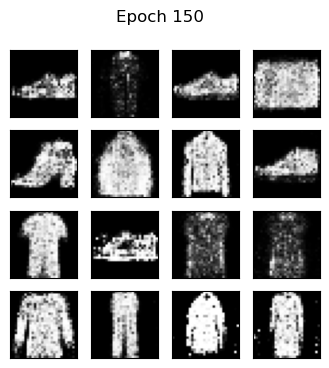

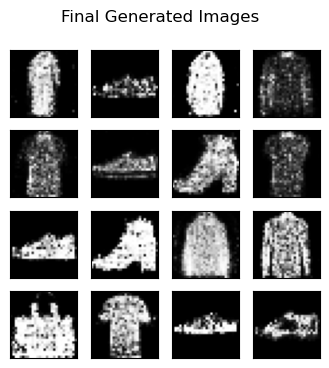

In [4]:
data_loader = trainLoader
# Generator definition

class Generator(nn.Module):

    def __init__(self, noise_dimension=100):

        super(Generator, self).__init__()

        self.model = nn.Sequential(

            nn.Linear(noise_dimension, 256),

            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 512),

            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(512, 1024),

            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(1024, 784),

            nn.Tanh(),

        )
 
    def forward(self, z):

        return self.model(z).view(-1, 1, 28, 28)
 
# Discriminator definition

class Discriminator(nn.Module):

    def __init__(self):

        super(Discriminator, self).__init__()

        self.model = nn.Sequential(

            nn.Linear(784, 512),

            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(512, 256),

            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 1),

            nn.Sigmoid(),

        )
 
    def forward(self, img):

        flattened = img.view(img.size(0), -1)

        return self.model(flattened)
    
    
 
# Initialize generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)
 
# Optimizers
lr = 0.0002
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)
 
# Loss function
criterion = nn.BCELoss()
 
# Number of epochs and noise dimension
n_epochs = 150
noise_dim = 100
 
# Function to visualize generated images
def show_generated_images(generator, noise_dimension, num_images=16, title=""):
    noise = torch.randn(num_images, noise_dimension, device=device)
    with torch.no_grad():
        generated_images = generator(noise).cpu().numpy()
    generated_images = np.reshape(generated_images, newshape=(-1, 28, 28))
    fig, axes = plt.subplots(4, 4, figsize=(4, 4), sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), generated_images):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.imshow(img.squeeze(), cmap='gray')
    plt.suptitle(title)
    plt.show()
 
# Training loop
for epoch in range(n_epochs):
    for i, (imgs, _) in enumerate(trainLoader):
 
        # Move images to the appropriate device
        imgs = imgs.to(device)
 
        # Train Discriminator
        optimizer_D.zero_grad()
 
        real_labels = torch.ones(imgs.size(0), 1, device=device)
        fake_labels = torch.zeros(imgs.size(0), 1, device=device)
 
        real_loss = criterion(discriminator(imgs), real_labels)
        real_loss.backward()
 
        noise = torch.randn(imgs.size(0), noise_dim, device=device)
        fake_imgs = generator(noise).detach()
        fake_loss = criterion(discriminator(fake_imgs), fake_labels)
        fake_loss.backward()
 
        optimizer_D.step()
 
        # Train Generator
        optimizer_G.zero_grad()
 
        gen_labels = torch.ones(imgs.size(0), 1, device=device)
        loss_G = criterion(discriminator(generator(noise)), gen_labels)
        loss_G.backward()
 
        optimizer_G.step()
 
        # Logging
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{n_epochs}], Step [{i+1}/{len(trainLoader)}], D_loss: {real_loss.item() + fake_loss.item()}, G_loss: {loss_G.item()}")
 
    # Visualize images periodically
    if (epoch + 1) % 10 == 0:
        show_generated_images(generator, noise_dim, title=f"Epoch {epoch + 1}")
 
# Final visualization
show_generated_images(generator, noise_dim, title="Final Generated Images")


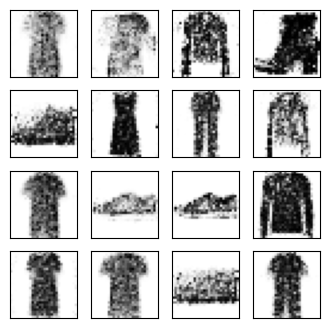

In [5]:
num_images = 16
noise_dimension = 100
noise = torch.randn(num_images, noise_dimension, device=device)
with torch.no_grad():
    generated_images = generator(noise).cpu().numpy()
generated_images = np.reshape(generated_images, newshape=(-1, 28, 28))
fig, axes = plt.subplots(4, 4, figsize=(4, 4), sharey=True, sharex=True)
for ax, img in zip(axes.flatten(), generated_images):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(img.squeeze(), cmap='gray_r')
plt.show()